Reads the two parquet files into dataframe.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import json

frame1 = pd.read_parquet("part-00000-96ac3cdd-9fe4-4189-a066-f7b73d199c16-c000.gz.parquet", engine='pyarrow')
frame2 = pd.read_parquet("part-00000-ae0248c1-9d9a-4943-8350-71a5267f9c51-c000.gz.parquet", engine='pyarrow')

This function extracts the title of the each snapshot in the payload column.

In [2]:
def extract_title(data):
    soup = BeautifulSoup(data, 'html.parser')
    if soup.title:
        return soup.title.text
    else:
        return "Title not found"

In [3]:
frame1['Title'] = frame1['payload'].apply(lambda x: extract_title(x))

In [3]:
frame2['Title'] = frame2['payload'].apply(lambda x: extract_title(x))

This function extracts text from the body tag of the html text in snapshots.

In [4]:
def extract_body_text(data):
    soup = BeautifulSoup(data, 'html.parser')
    # removes the script tag inside the body tag
    for script in soup(['script', 'head']):
        script.extract()
    
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop the blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    #text = text.split("\n",24)[24]
    num = text.find("Jump")
    if num == -1:
        return ""
    else:
        return text[num:]

In [ ]:
frame1['body_Text'] = frame1['payload'].apply(lambda x: extract_body_text(x))

In [5]:
frame2['body_Text'] = frame2['payload'].apply(lambda x: extract_body_text(x))

This calculates the length of the body text.

In [6]:
frame1['body_Length'] = frame1['body_Text'].apply(lambda x: len(x))

In [6]:
frame2['body_Length'] = frame2['body_Text'].apply(lambda x: len(x))

This formats the timestamp column of the data into the YYYY-MM-DD format.

In [7]:
frame1['timestamp'] = pd.to_datetime(frame1['timestamp'], infer_datetime_format=True)

In [7]:
frame2['timestamp'] = pd.to_datetime(frame2['timestamp'], infer_datetime_format=True)

In [21]:
frame1['Year'] = frame1['timestamp'].apply(lambda x: x.year)
frame1['Month'] = frame1['timestamp'].apply(lambda x: x.month)

In [223]:
import matplotlib.pyplot as plt
g = frame1.groupby(['Year'])['body_Length'].mean()
#g.plot()
plt.show()

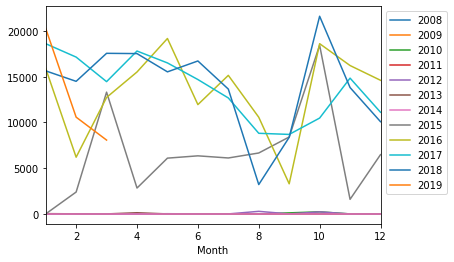

In [224]:
h = g.keys()
abc = frame1.groupby(['Year', 'Month'])['body_Length'].mean()
for y in h:
    abc[y].plot()
plt.legend(h, bbox_to_anchor=(1.0,1.0))

In [8]:
def extract_head_text(data):
    soup = BeautifulSoup(data, 'html.parser')
    #removes the unwanted tags
    for script in soup(['script', 'body']):
        script.extract()
    
    line = soup.find('head')
    #returns the text from head
    if line:
        return line.text.strip()
    else:
        return ""

In [54]:
frame = frame1[:100]
frame['text'] = frame['payload'].apply(lambda x: extract_head_text(x))

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
frame1['header_text'] = frame1['payload'].apply(lambda x: extract_head_text(x))

In [11]:
frame1['header_length'] = frame1['header_text'].apply(lambda x: len(x))

In [12]:
frame1 = frame1.drop(columns=['key', 'surtUrl', 'mime', 'status', 'digest', 'redirectUrl', 'meta', 'filename', 'allheader', 
                     'offset', 'payload'])

In [14]:
frame1.to_csv('data1.csv')

In [9]:
frame2

,key,surtUrl,timestamp,originalUrl,mime,status,digest,redirectUrl,meta,contentLength,offset,filename,allheader,payload,Title,body_Text,body_Length
0,"http://(com,visitcalifornia,www,)/364Californi...","http://(com,visitcalifornia,www,)/",2007-11-29,http://www.visitcalifornia.com/,text/html,200,-,-,-,21289,364,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,"HTTP/1.1 200 OK\r\nDate: Thu, 29 Nov 2007 13:2...",California's Official Vacation Guide | Califor...,,0
1,"http://(com,visitcalifornia,www,)/6089Californ...","http://(com,visitcalifornia,www,)/",2007-12-27,http://www.visitcalifornia.com/,text/html,200,-,-,-,21160,6089,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,"HTTP/1.1 200 OK\r\nDate: Thu, 27 Dec 2007 10:5...",California's Official Vacation Guide | Califor...,,0
2,"http://(com,visitcalifornia,www,)/11824Califor...","http://(com,visitcalifornia,www,)/",2008-01-31,http://www.visitcalifornia.com/,text/html,200,-,-,-,21210,11824,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,"HTTP/1.1 200 OK\r\nDate: Thu, 31 Jan 2008 23:2...",California's Official Vacation Guide | Califor...,,0
3,"http://(com,visitcalifornia,www,)/17565Califor...","http://(com,visitcalifornia,www,)/",2008-02-28,http://www.visitcalifornia.com/,text/html,301,-,-,-,958,17565,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\t404 playground!\r\n,,0
4,"http://(com,visitcalifornia,www,)/18404Califor...","http://(com,visitcalifornia,www,)/",2008-09-25,http://www.visitcalifornia.com/,text/html,301,-,-,-,1127,18404,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
5,"http://(com,visitcalifornia,www,)/19320Califor...","http://(com,visitcalifornia,www,)/",2008-11-29,http://www.visitcalifornia.com/,text/html,301,-,-,-,1092,19320,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
6,"http://(com,visitcalifornia,www,)/20215Califor...","http://(com,visitcalifornia,www,)/",2009-04-30,http://www.visitcalifornia.com/,text/html,301,-,-,-,1092,20215,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
7,"http://(com,visitcalifornia,www,)/21110Califor...","http://(com,visitcalifornia,www,)/",2009-05-14,http://www.visitcalifornia.com/,text/html,301,-,-,-,1092,21110,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
8,"http://(com,visitcalifornia,www,)/22004Califor...","http://(com,visitcalifornia,www,)/",2009-07-23,http://www.visitcalifornia.com/,text/html,301,-,-,-,1092,22004,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
9,"http://(com,visitcalifornia,www,)/22899Califor...","http://(com,visitcalifornia,www,)/",2009-10-11,http://www.visitcalifornia.com/,text/html,301,-,-,-,1092,22899,California2_www-visitcalifornia-com_200103-201...,file:/home/xw0078/data/tourism-data/vt-tourism...,HTTP/1.1 301 Moved Permanently\r\nConnection: ...,\r\n\tThe page you requested does not exist\r\n,,0
